In [52]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from simulation import data
import pandas
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from player_dicts import *

In [6]:
#get player data from result page
DATA = data.parse(PLAYER_ID)

|==============================| 100% | Done!


In [96]:
#define the lanes for the CUP system
lanes_e = [ 'E'+str(i) for i in [1,3,4,5,12,13,14,16,17 ]]
lanes_f = [ 'F'+str(i) for i in [2,4,7,8,12,13,15,17,18]]
LANES = [*lanes_e,*lanes_f]
LANES_ALL = [*[ 'E'+str(i+1) for i in range(18)],
             *[ 'F'+str(i+1) for i in range(18)]]
print(LANES_ALL)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18']


In [42]:
from simulation.matchplay import gen_Cup_16
from simulation.matchplay import gen_Cup_32
#MC simulation
n_MC = 1000
medals_w = [x.medals for x in gen_Cup_16(RANK_W,DATA,LANES,n_MC) ]
medals_m = [x.medals for x in gen_Cup_32(RANK_M,DATA,LANES,n_MC) ]

In [59]:
#Plot function for the most common winners
def plot_most_common(medals,n_top=10):
    winners = [x[0] for x in medals]
    letter_counts = Counter(winners)
    dtf = pandas.Series(OrderedDict(letter_counts.most_common(n_top))).plot(kind='bar')
    return dtf

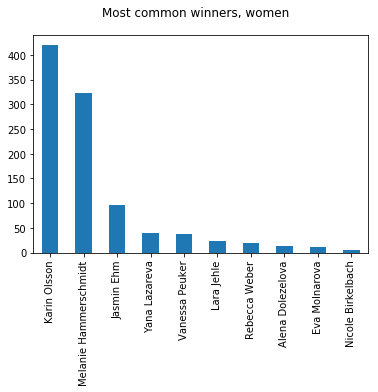

In [224]:
dtf = plot_most_common(medals_w)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Most common winners, women')
fig.savefig('../FIG/winners_w',bbox_inches = 'tight')

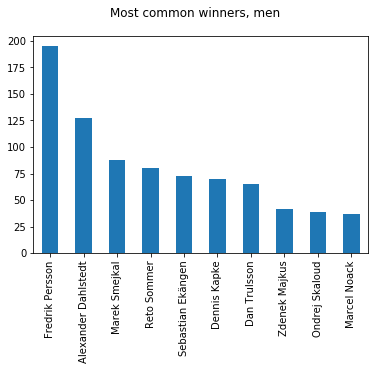

In [223]:
dtf = plot_most_common(medals_m)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Most common winners, men')
fig.savefig('../FIG/winners_m',bbox_inches = 'tight')

In [94]:
from simulation.game import Game_lanelog
score = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES).score
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES).lanelog
print(score)
print(lanelog)

[5, 2]
[0, 0, -1, 0, 0, 0, 0, 0, 1, -1, 0, 0, 1, 1, 0, 0, 0, 0]


In [100]:
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL).lanelog
print(lanelog)
lanelog2  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL).lanelog
print(lanelog2)

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, -1, -1, -1, 1, 1, -1, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 1, 1, -1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 0, 0, 0, 1, -1, 0, 1, 0, 0, -1, 0, -1, 0]


In [187]:
def getresdict(lanes):
    resdict = dict()
    for lane in lanes:
        resdict[lane] = 0
    return resdict
    
def addGame(p1,p2,lanes, resdict):
    for i,el in enumerate( Game_lanelog(p1,p2,'E1',DATA,lanes).lanelog):
        resdict[lanes[i]] = resdict[lanes[i]] + el 
    return resdict
    
import operator                             #Importing operator module
def plotSortedLanes(res_all):
    dc_sort = sorted(res_all.items(),key = operator.itemgetter(1),reverse = True)
    keys = [v[0] for v in dc_sort]
    vals = [v[1] for v in dc_sort]

    plt.figure(figsize=(13,5))
    barlist = plt.bar(range(len(vals)), vals, align='center')
    plt.xticks(range(len(vals)), keys)
    for i,el in enumerate(keys):
        try:
            LANES.index(el)
            barlist[i].set_color('r')
        except:
            pass
        

In [281]:
import numpy as np
names_m = [v for v in RANK_M.values()]
names_w = [v for v in RANK_W.values()]
np.random.choice(names)

'Marian Strasko'

In [298]:
def plotHighestScores(scores,lambda_f, n_plot):
    top_dict = OrderedDict()
    for el in sorted(scores.items(),
                     key = lambda_f,reverse = True)[:10]:
        top_dict[el[0]] = lambda_f(el)
    dtf = pandas.Series(top_dict).plot(kind='bar')
    return dtf

def get_lane_scores(p1,names):
    res_all = getresdict(LANES_ALL)
    for _ in range(1000):
        p2 = np.random.choice(names)
        if (p1 != p2):
            res_all = addGame(p1,p2,LANES_ALL,res_all)
    return res_all
    

def getnormscoresdict(names):
    norm_scores = dict()
    for n in names:
        lane_scores = get_lane_scores(n,names)
        norm_scores[n] = (get_normalized_score(lane_scores,LANES), 
                          get_normalized_score(lane_scores,LANES_ALL) )
    
        print(n,norm_scores[n])
    return norm_scores

norm_scores_w = getnormscoresdict(names_w)
norm_scores_m = getnormscoresdict(names_m)

Melanie Hammerschmidt (0.7403355215171408, 0.5210974849303679)
Karin Olsson (0.9671104150352389, 0.51985559566787)
Lara Jehle (0.0297029702970297, 0.10470866480326811)
Eva Molnarova (-0.004372267332916927, 0.15630614444843693)
Vanessa Peuker (0.2768060836501901, 0.08814141910139946)
Jasmin Ehm (0.3744722312439104, 0.09552556818181818)
Marielle Svensson (-0.04645642590708715, 0.05726872246696035)
Nicole Birkelbach (-0.023703194778426657, 0.06764822920811779)
Alena Dolezelova (0.1812247435498912, 0.2265702071686945)
Yvonne Trachsel (-0.056915739268680446, -0.0793856103476152)
Katerina Tietzova (-0.5182413470533208, -0.10006189395502373)
Rebecca Weber (0.2928209711051534, -0.00030084235860409147)
Jasmin Hansson (-0.23392612859097128, -0.1734752589182969)
Maja Wicki (-0.8426076833527357, -0.6667631731325999)
Laura Fogh Henriksen (-0.5386004514672686, -0.20193565262882554)
Yana Lazareva (0.3525054466230937, -0.09525277435265105)
Reto Sommer (0.40105342362678703, 0.4297581236257024)
Alexande

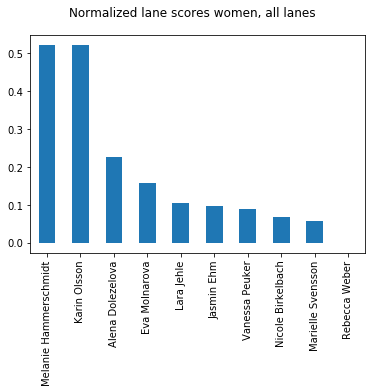

In [310]:
dtf = plotHighestScores(norm_scores_w,lambda x: x[1][1], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, all lanes')
fig.savefig('../FIG/lanescores_w_all',bbox_inches = 'tight')

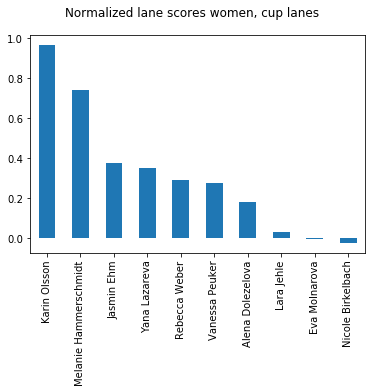

In [311]:
dtf = plotHighestScores(norm_scores_w,lambda x: x[1][0], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, cup lanes')
fig.savefig('../FIG/lanescores_w_cup',bbox_inches = 'tight')

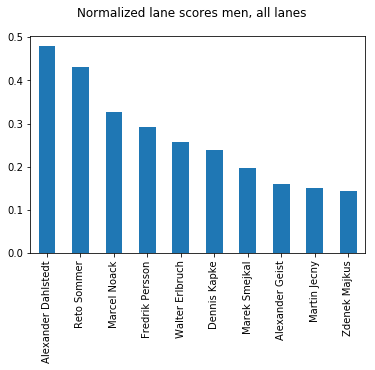

In [312]:
dtf = plotHighestScores(norm_scores_m,lambda x: x[1][1], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, all lanes')
fig.savefig('../FIG/lanescores_m_all',bbox_inches = 'tight')

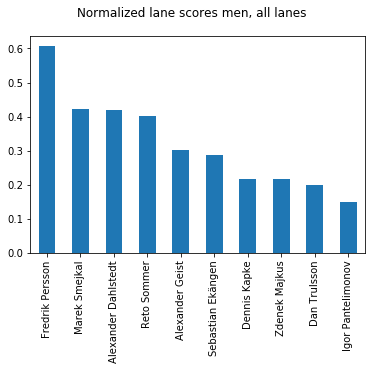

In [313]:
dtf = plotHighestScores(norm_scores_m,lambda x: x[1][0], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, all lanes')
fig.savefig('../FIG/lanescores_m_cup',bbox_inches = 'tight')

In [ ]:
def plotEndsScores(scores,lambda_f, n_plot):
    top_dict = OrderedDict()
    sorted_scores = sorted(scores.items(),
                     key = lambda_f,reverse = True)
    for el in sorted_scores[:n_plot]+sorted_scores[-n_plot:]:
        top_dict[el[0]] = lambda_f(el)
    dtf = pandas.Series(top_dict).plot(kind='bar')
    return dtf

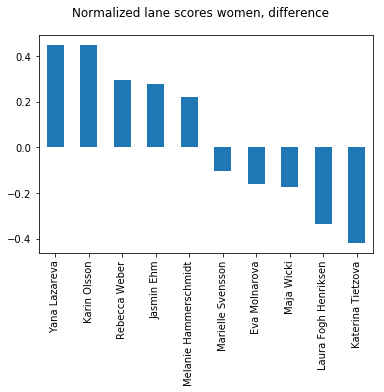

In [329]:
dtf = plotEndsScores(norm_scores_w,lambda x: x[1][0]-x[1][1], 5)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, difference')
fig.savefig('../FIG/lanescores_w_diff',bbox_inches = 'tight')

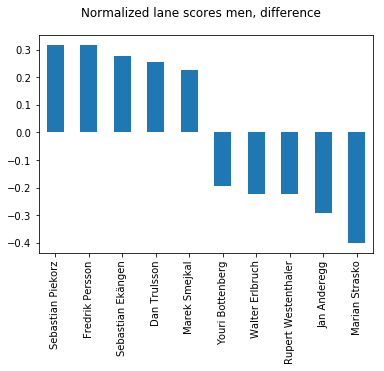

In [327]:
dtf = plotEndsScores(norm_scores_m,lambda x: x[1][0]-x[1][1], 5)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, difference')
fig.savefig('../FIG/lanescores_m_diff',bbox_inches = 'tight')

In [323]:
x = [x for x in range(10)]
print(x)
print(x[:3])
print(x[:3]+x[-3:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2]
[0, 1, 2, 7, 8, 9]


0.6111731843575419
0.29573984776630935


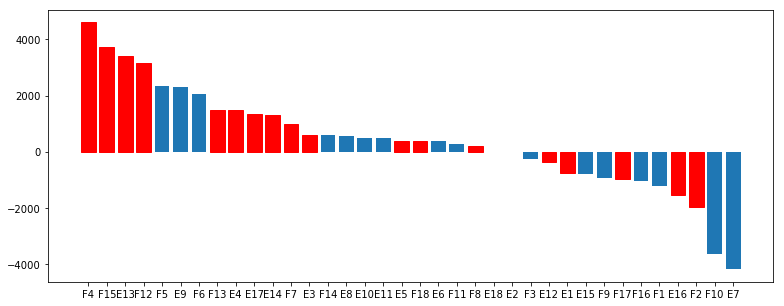

In [232]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Fredrik Persson'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

0.2288929361259269
-0.051334629031970475


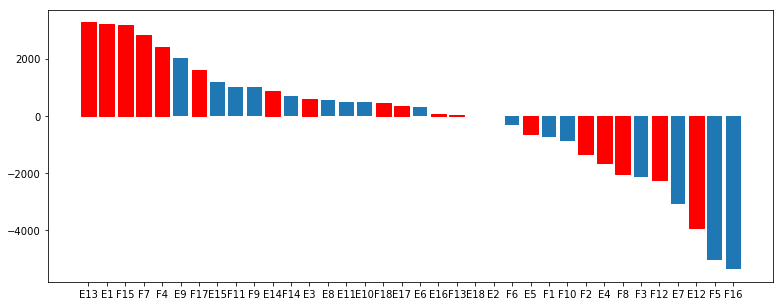

In [233]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Dan Trulsson'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

0.41559009420837145
0.19804622133779567


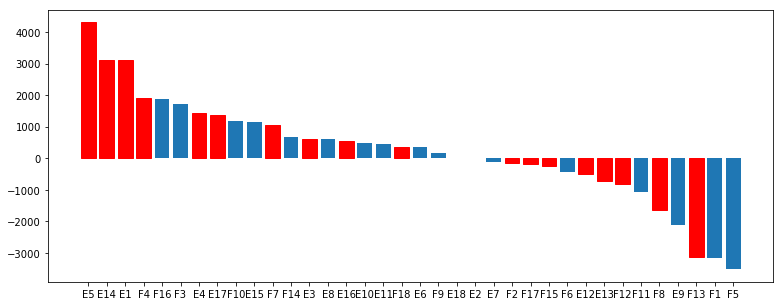

In [234]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Marek Smejkal'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

-0.1294559099437148
-0.014637656460073093


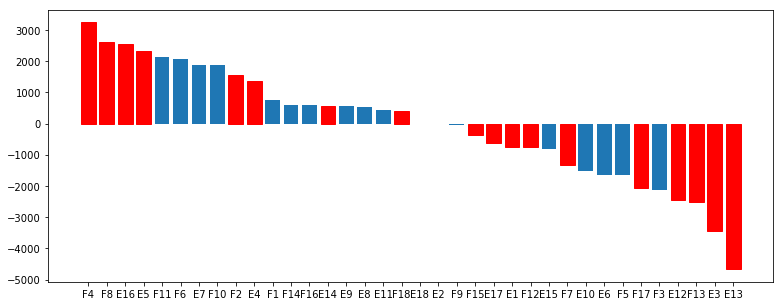

In [235]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Christian Gobetz'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

In [222]:
def get_normalized_score(result, lanes):
    count = 0
    score = 0
    for el in lanes:
        #print(el)
        count = count + abs(result[el])
        score = score + result[el]
    return (score/count)

print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))
    

-0.2506475613116561
-0.10542790069004766
